### This example shows how to generate bin-and-mean plots

In [1]:
import sys
sys.dont_write_bytecode = True
sys.path.append('../')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import plot_utils as pu

In [4]:
%matplotlib inline

### Load datasets

The first column of this dataset (`max_strain`) is the x, and the other columns are different y's.

In [5]:
df = pd.read_csv('./datasets/All_2756_goodness_of_fit_scores.csv')
df.head()

,max_strain,LN,EQ_MKZ,EQ_HH,NL_MKZ,NL_HH
0,0.014217,4.017424,3.263716,3.263708,3.985189,4.013756
1,0.004901,3.238252,3.128535,3.128528,3.599144,3.585297
2,0.008028,2.993681,2.879698,2.879696,2.872768,2.854251
3,0.008043,3.326505,3.397517,3.397513,3.650858,3.636931
4,0.019360,3.517135,3.343279,3.343305,3.150827,3.472270


### Plot data `LN` against `max_strain`:

We can see from the raw data points that y increases with x, and the averaged data shows the same trend.
The error bounds are shown as shaded areas.

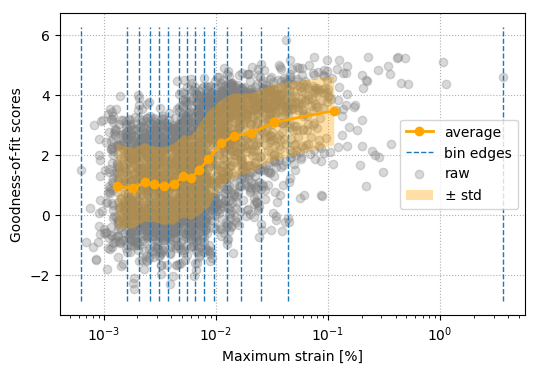

In [6]:
x, y = df['max_strain'], df['LN']
pu.bin_and_mean(x, y, logx=True, bins=15,  # use a custom bin number, 15
                xlabel='Maximum strain [%]',ylabel='Goodness-of-fit scores');

### Plot `NL_HH` against `max_strain`

Even though the raw data points does not show a clear trend, we can observe the trend from the averaged x and y, and also the error bounds:

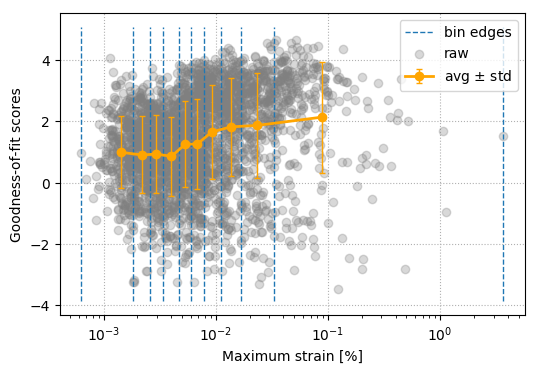

In [7]:
x, y = df['max_strain'], df['NL_HH']
pu.bin_and_mean(x, y, logx=True, show_bins=True, error_bars_on=True, error_shades_on=False,
                xlabel='Maximum strain [%]',ylabel='Goodness-of-fit scores');

### Showing multiple sets of averaged data points together:

Calculate averaged data points for each (x,y) data sets:

In [8]:
bins = [0.0003, 0.0006, 0.0008,   # hand picked bin edges
        0.001, 0.002, 0.003, 0.004, 0.005, 0.007, 0.008, 0.009,
        0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08,
        0.1, 0.3, 1, 10]
_,_,x1,y1,_ = pu.bin_and_mean(df['max_strain'],df['LN'], bins=bins, show_fig=False)
_,_,x2,y2,_ = pu.bin_and_mean(df['max_strain'],df['EQ_MKZ'], bins=bins, show_fig=False)
_,_,x3,y3,_ = pu.bin_and_mean(df['max_strain'],df['EQ_HH'], bins=bins, show_fig=False)
_,_,x4,y4,_ = pu.bin_and_mean(df['max_strain'],df['NL_MKZ'], bins=bins, show_fig=False)
_,_,x5,y5,_ = pu.bin_and_mean(df['max_strain'],df['NL_HH'], bins=bins, show_fig=False)

Plotting the averaged data points together, we can then have a better understanding of the trends in different y's.

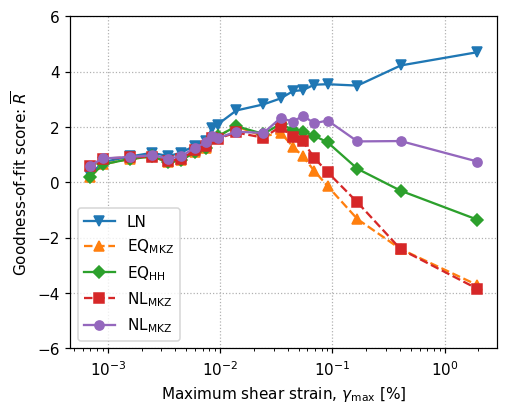

In [9]:
fig = plt.figure(figsize=(5, 4), dpi=110)
ax = plt.axes()
ax.plot(x1, y1, '-v', label='LN')
ax.plot(x2, y2, '--^', label='$\mathregular{EQ_{MKZ}}$')
ax.plot(x3, y3, '-D', label='$\mathregular{EQ_{HH}}$')
ax.plot(x4, y4, '--s', label='$\mathregular{NL_{MKZ}}$')
ax.plot(x5, y5, '-o', label='$\mathregular{NL_{MKZ}}$')
ax.set_xscale('log')
ax.grid(ls=':')
ax.set_xlabel('Maximum shear strain, $\gamma_{\max}$ [%]')
ax.set_ylabel('Goodness-of-fit score: $\overline{R}$')
ax.legend(loc='best')
ax.set_ylim(-6,6);